In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sc

# Data collection and processing

In [2]:
#Import Dataset
heart_data = pd.read_csv(r"C:\Users\dell\OneDrive\Documents\heart_attack_prediction_dataset.csv")

In [3]:
heart_data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [4]:
#To check total number of rows and columns in our dataset
heart_data.shape

(8763, 26)

In [5]:
#To check whether the dataset has null values or not
heart_data.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [6]:
#To check the datatype of each column
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [7]:
heart_data = heart_data.drop('Patient ID', axis = 1) #This column is outlier and we dont need it 

In [8]:
heart_data['BP_systolic'] = heart_data['Blood Pressure'].apply(lambda x: x.split("/")[0])
heart_data['BP_diastolic'] = heart_data['Blood Pressure'].apply(lambda x: x.split("/")[1]) 


heart_data = heart_data.drop(columns=['Blood Pressure']) #The Blood pressure column has relevance to heart attack risk but we need to change it to numerical feature

In [9]:
heart_data['BP_systolic'] = pd.to_numeric(heart_data['BP_systolic'])
heart_data['BP_diastolic'] = pd.to_numeric(heart_data['BP_diastolic']) #change it to numerical value

In [10]:
heart_data['Diet']= heart_data['Diet'].replace({'Healthy': 0, 'Unhealthy': 1, 'Average': 2})
heart_data['Sex'] = heart_data['Sex'].replace({'Male': 0, 'Female': 1, 'Other': 2, 'Unknown': 3}) #change these categorial value to numerical 

In [11]:
heart_data.dtypes

Age                                  int64
Sex                                  int64
Cholesterol                          int64
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                 int64
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent                           object
Hemisphere                          object
Heart Attac

In [12]:
heart_data['Heart Attack Risk'].value_counts() #check the count of target value

Heart Attack Risk
0    5624
1    3139
Name: count, dtype: int64

1-- represent defective heart 0-- represent healthy heart 

In [13]:
heart_data22 = heart_data.copy()
heart_data22.head() #copy the dataset

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,BP_systolic,BP_diastolic
0,67,0,208,72,0,0,1,0,0,4.168189,...,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,21,0,389,98,1,1,1,1,1,1.813242,...,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,21,1,324,72,1,0,0,0,0,2.078353,...,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,174,99
3,84,0,383,73,1,1,1,0,1,9.828130,...,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,66,0,318,93,1,1,1,1,0,5.804299,...,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88


In [14]:
heart_data22.describe()  #To generate a summary of descriptive statistics for the numerical columns of dataset

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,BP_systolic,BP_diastolic
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,0.302636,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,...,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211,135.075659,85.156111
std,21.249509,0.459425,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,...,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502,26.349976,14.676565
min,18.000000,0.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,...,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000,90.000000,60.000000
25%,35.000000,0.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,...,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000,112.000000,72.000000
50%,54.000000,0.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,...,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000,135.000000,85.000000
75%,72.000000,1.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,...,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000,158.000000,98.000000
max,90.000000,1.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,...,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000,180.000000,110.000000


## Statistical summary of the numerical features

Age: Ranges from 18 to 90, with an average of 54 years.

Sex: mean of around 0.30, meaning approximately 30% of the dataset are females (represented by 1) and 70% are males (represented by 0).

Cholesterol: Mean is 259 mg/dL, indicating generally high cholesterol levels.

Heart Rate: Average of 75 bpm, with a reasonable range (40–110 bpm).

Diabetes, Family History, Smoking, Obesity: Binary indicators (0 or 1).

BMI: Mean of ~29 indicates the population is close to the obesity threshold.

Triglycerides: The average value is 417.68, with a range from 30 to 800.

Sleep Hours Per Day: The average is around 7 hours, which is typical for most people.

BP_systolic: Ranges from 90 to 180 mm Hg, with an average of around 135 mm Hg.

BP_diastolic: Ranges from 60 to 110 mm Hg, with an average of around 85 mm Hg.

# Key Insights:
    
Health Indicators:

The population shows a mean BMI of 28.89, close to obesity thresholds.

Cholesterol and triglycerides have high average values, indicating a health risk.

Lifestyle Factors:

Exercise: Average of 10 hours per week.
    
Sedentary hours and physical activity suggest a moderately active lifestyle.

Heart Attack Risk: Calculated on a 0–1 scale (mean: 0.36), indicating a generally low-risk population.

In [15]:
heart_data22 = heart_data22.drop('Country',axis = 1)
heart_data22 =heart_data22.drop('Continent',axis = 1)
heart_data22 =heart_data22.drop('Hemisphere',axis = 1)
#remove irrelevant columns

In [16]:
heart_data22 =heart_data22.drop('Income',axis = 1) 

In [17]:
heart_data22.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Medication Use,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,BP_systolic,BP_diastolic
0,67,0,208,72,0,0,1,0,0,4.168189,...,0,9,6.615001,31.251233,286,0,6,0,158,88
1,21,0,389,98,1,1,1,1,1,1.813242,...,0,1,4.963459,27.194973,235,1,7,0,165,93
2,21,1,324,72,1,0,0,0,0,2.078353,...,1,9,9.463426,28.176571,587,4,4,0,174,99
3,84,0,383,73,1,1,1,0,1,9.828130,...,0,9,7.648981,36.464704,378,3,4,0,163,100
4,66,0,318,93,1,1,1,1,0,5.804299,...,0,6,1.514821,21.809144,231,1,5,0,91,88


# EXPLORATORY DATA ANALYSIS

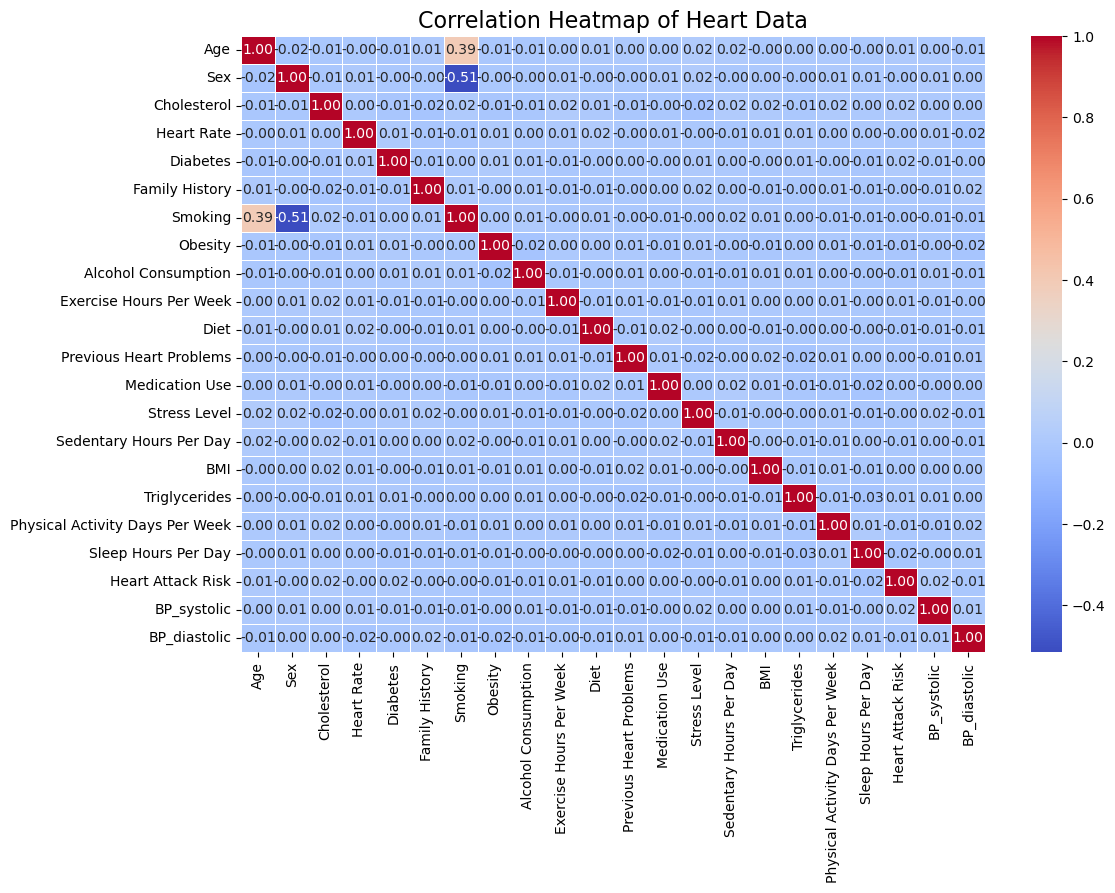

In [20]:
corr_matrix = heart_data22.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap of Heart Data', fontsize=16)
plt.show()
#To visually understand the relationships between multiple variables

# Distribution: HISTOGRAM

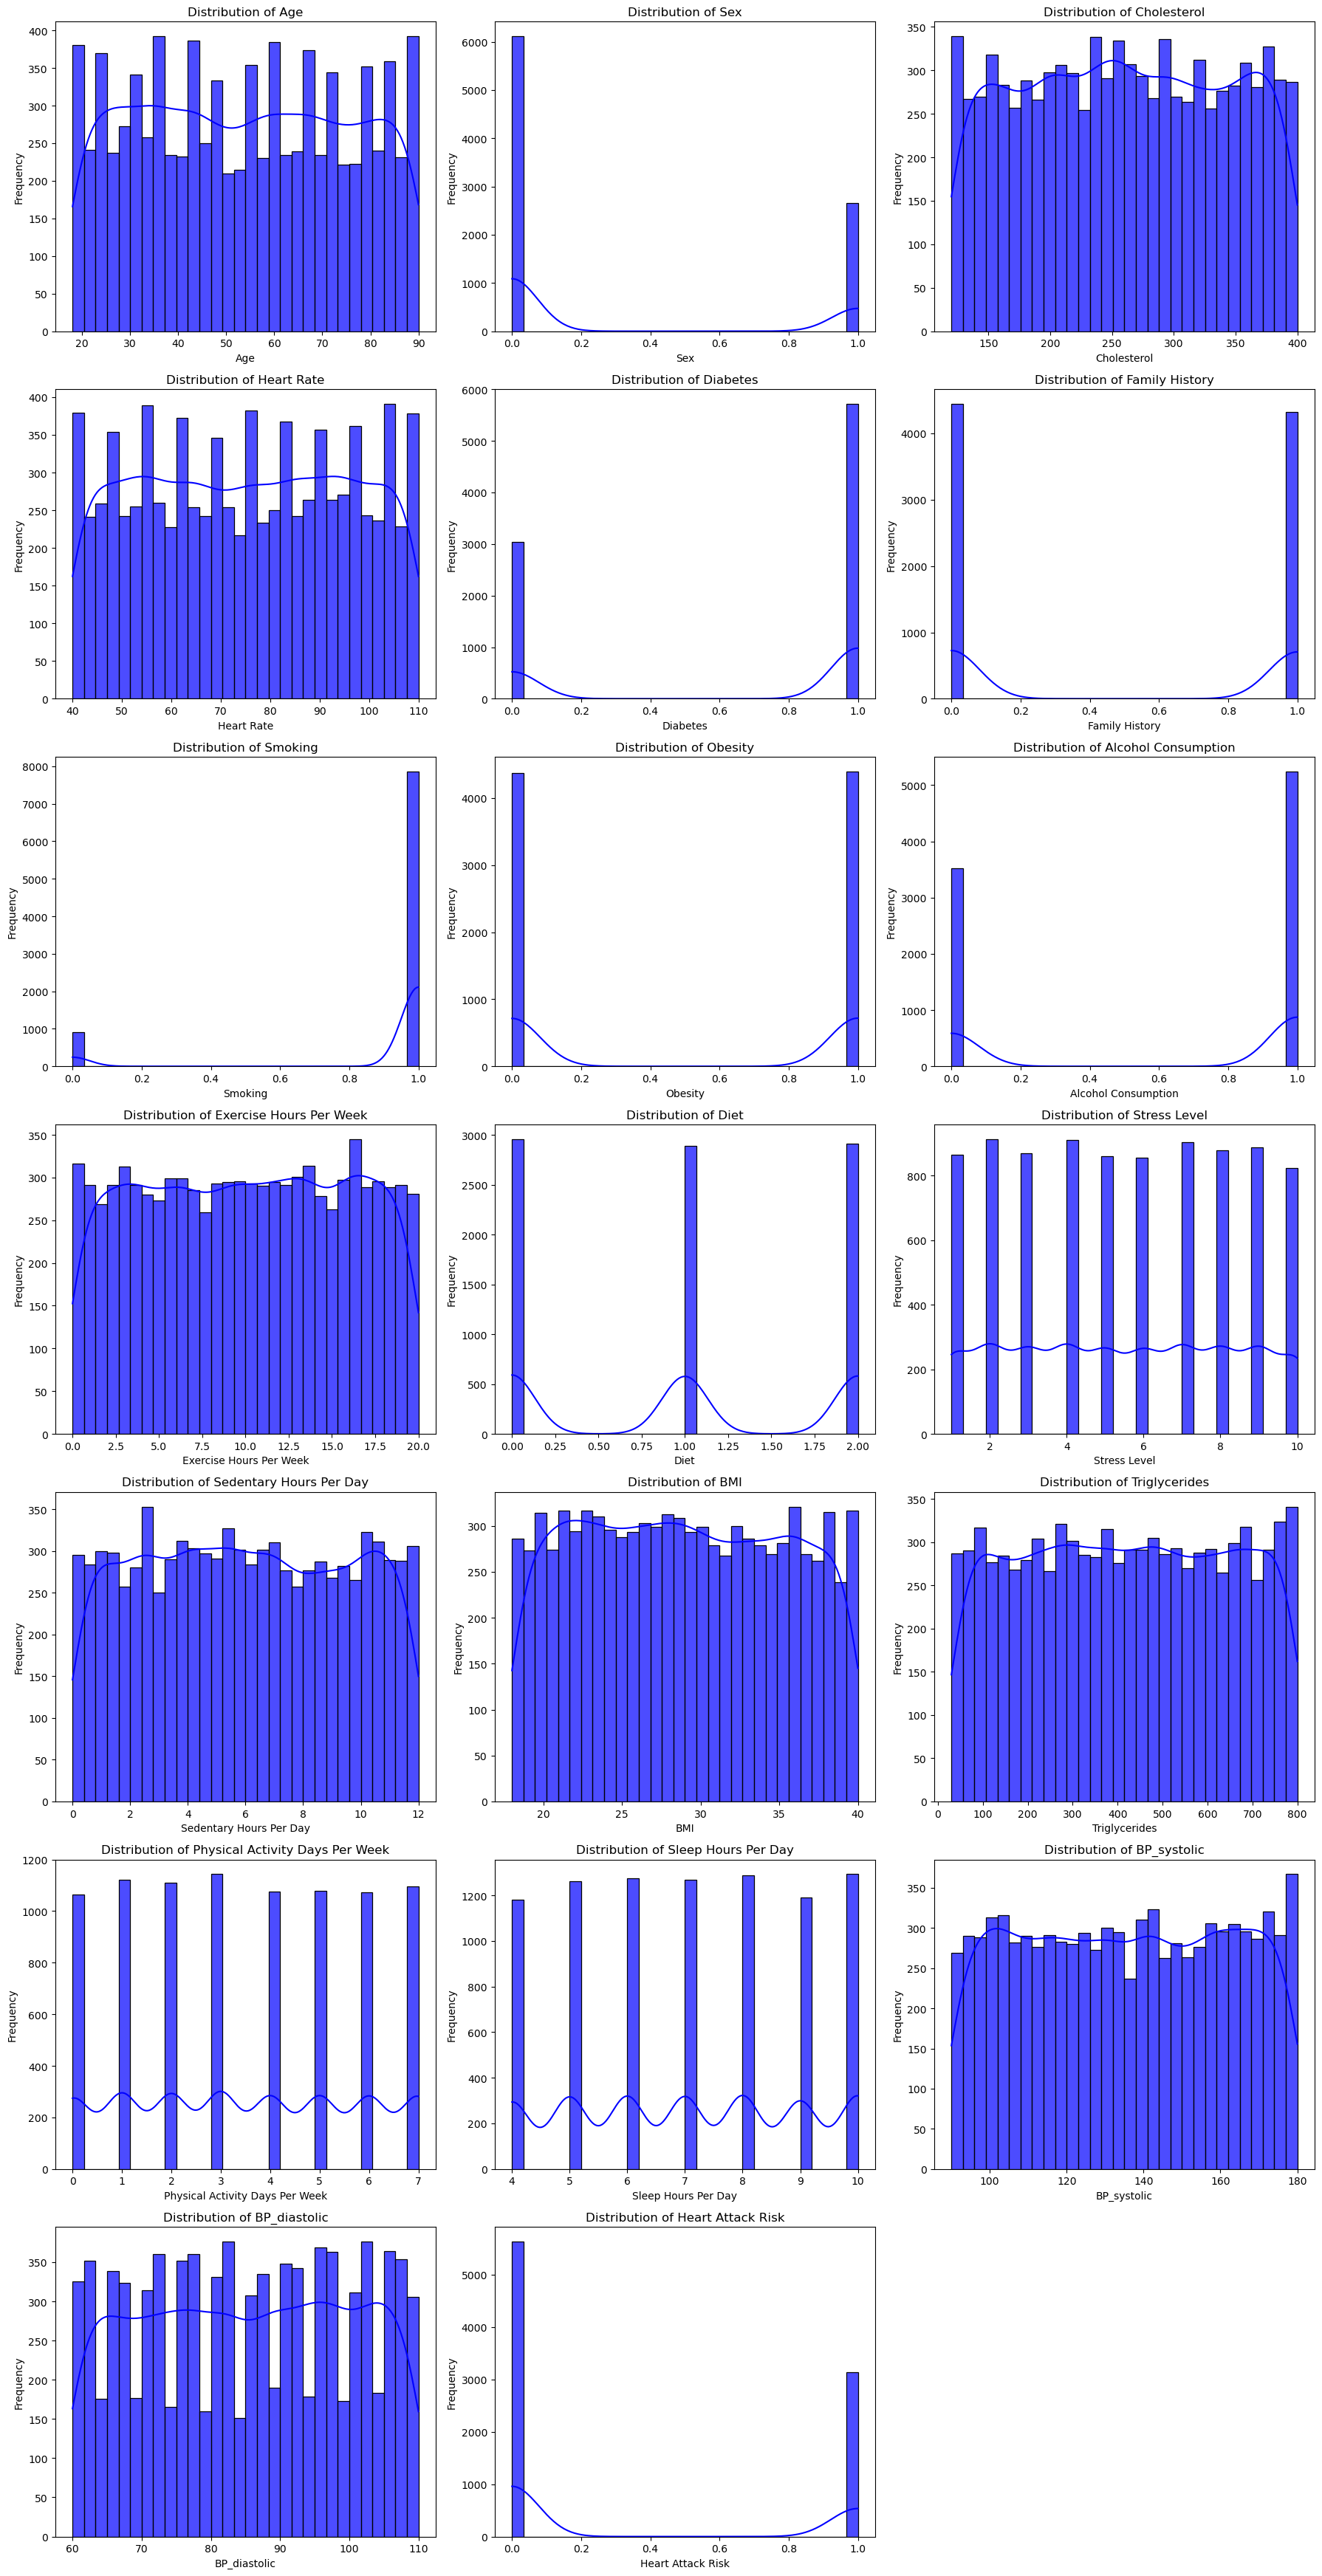

In [21]:
continuous_vars = ['Age','Sex', 'Cholesterol', 'Heart Rate','Diabetes','Family History','Smoking','Obesity',
                   'Alcohol Consumption','Exercise Hours Per Week', 'Diet','Stress Level', 'Sedentary Hours Per Day', 'BMI', 
    'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day','BP_systolic','BP_diastolic',
                   'Heart Attack Risk']

num_vars = len(continuous_vars)
cols = 3 
rows = (num_vars // cols) + (num_vars % cols > 0)

plt.figure(figsize=(18, rows * 5))

for i, var in enumerate(continuous_vars, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(heart_data[var], kde=True, bins=30, color='blue', alpha=0.7)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Age: The age of the individual in years. This variable can affect heart disease risk, with older age groups generally having a higher risk.

Sex: The gender of the individual, represented as a binary value (e.g., 0 for male and 1 for female). Gender can influence heart disease risk.

Cholesterol: The cholesterol level in the blood, typically measured in mg/dL. High cholesterol is a significant risk factor for heart disease.

Heart Rate: The number of heartbeats per minute (bpm). A higher resting heart rate may be associated with increased risk for heart disease.

Diabetes: Whether the individual has diabetes (1) or not (0). Diabetes is a significant risk factor for heart disease.

Family History: Whether there is a family history of heart disease (1) or not (0). A family history of heart disease increases the risk for an individual.

Smoking: Whether the individual smokes (1) or not (0). Smoking is a major contributor to heart disease risk.

Obesity: Whether the individual is obese (1) or not (0). Obesity is a known risk factor for heart disease.

Alcohol Consumption: Whether the individual consumes alcohol (1) or not (0). Excessive alcohol consumption increases heart disease risk.

Exercise Hours Per Week: The number of hours per week the individual spends exercising. Regular physical activity can lower the risk of heart disease.

Diet: Whether the individual follows a specific diet (1) or not (0). A healthy diet can contribute to reducing heart disease risk.

Stress Level: A measure of the individual's stress levels, typically rated on a scale (e.g., 1–10). Chronic stress can increase the risk of heart disease.

Sedentary Hours Per Day: The number of hours per day the individual spends being sedentary (e.g., sitting or lying down). Prolonged sedentary behavior can increase the risk of heart disease.

BMI (Body Mass Index): A measure of body fat based on height and weight. A high BMI is often associated with higher risk for heart disease.

Triglycerides: A type of fat found in the blood, often measured in mg/dL. Elevated triglyceride levels are a risk factor for heart disease.

Physical Activity Days Per Week: The number of days per week the individual engages in physical activity. More active days are generally associated with lower heart disease risk.

Sleep Hours Per Day: The average number of hours the individual sleeps per day. Poor sleep patterns can increase the risk for cardiovascular disease.

BP_systolic (Systolic Blood Pressure): The top number in a blood pressure reading, which measures the pressure in the arteries when the heart beats. High systolic blood pressure can increase the risk of heart disease.

BP_diastolic (Diastolic Blood Pressure): The bottom number in a blood pressure reading, which measures the pressure in the arteries when the heart rests between beats. High diastolic blood pressure can also increase heart disease risk.

Heart Attack Risk: The target variable, representing the likelihood of an individual having a heart attack, often categorized as 0 (no risk) or 1 (high risk).

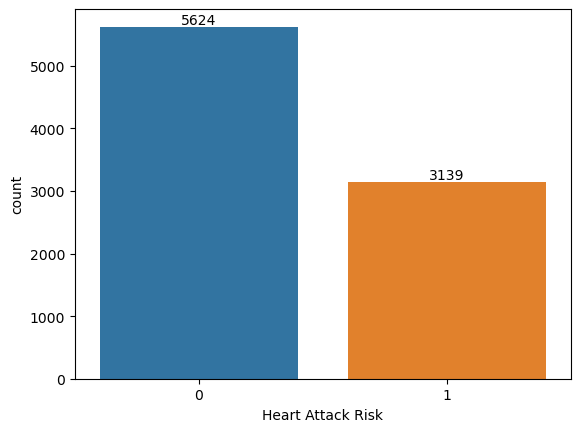

In [22]:
ax = sns.countplot(x='Heart Attack Risk',data = heart_data)

for bars in ax.containers:
    ax.bar_label(bars)  #In whole dataset how many people are prone to heart disease

# Visual Insights into Heart Attack Risk Determinants

In [27]:
heart_data['Age Group'] = pd.cut(heart_data['Age'], bins=[0, 18, 35, 50, 65, 100], 
                                 labels=['<18', '18-35', '36-50', '51-65', '65+'])

print(heart_data[['Age', 'Age Group']].head())
#group the age gap 

   Age Age Group
0   67       65+
1   21     18-35
2   21     18-35
3   84       65+
4   66       65+


In [28]:
heart_data.groupby(['Age Group'], as_index=False)['Heart Attack Risk'].sum().sort_values(by='Heart Attack Risk',ascending=False)
# which age group more prone to heart diasese

,Age Group,Heart Attack Risk
4,65+,1083
1,18-35,749
2,36-50,671
3,51-65,595
0,<18,41


<Axes: xlabel='Heart Attack Risk', ylabel='Age Group'>

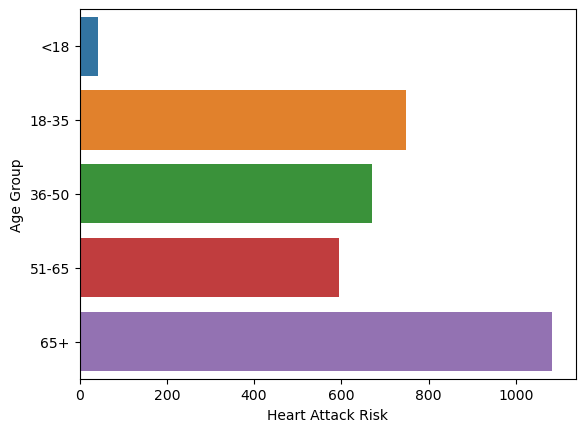

In [29]:
risk_gen = heart_data.groupby(['Age Group'], as_index=False)['Heart Attack Risk'].sum().sort_values(by='Heart Attack Risk',ascending=False)
sns.barplot(x='Heart Attack Risk', y= 'Age Group',data = risk_gen)
#show it in graph

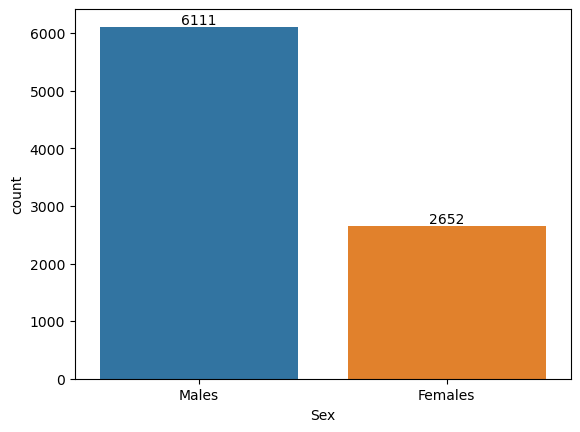

In [36]:
ax = sns.countplot(x='Sex',data = heart_data)
plt.xticks([0,1],['Males','Females'])

for bars in ax.containers:
    ax.bar_label(bars)
    
#How many male and female are in our dataset

In [37]:
heart_data.groupby(['Sex'], as_index=False)['Heart Attack Risk'].sum().sort_values(by='Heart Attack Risk',ascending=False)
#out of total how many male and female are prone to heart disease

,Sex,Heart Attack Risk
0,0,2195
1,1,944


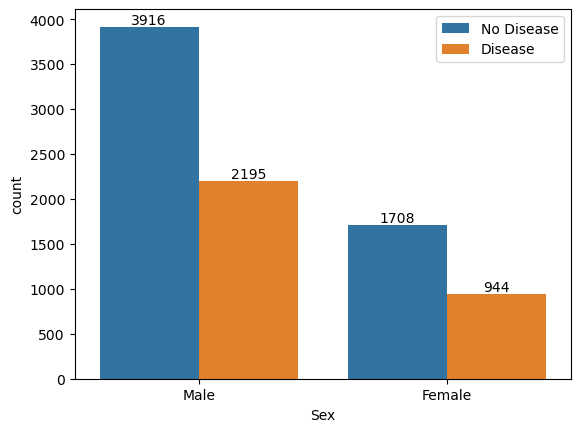

In [38]:
ax = sns.countplot(data = heart_data, x= heart_data['Sex'], hue = heart_data['Heart Attack Risk'])
plt.xticks([0,1],['Male','Female'])
plt.legend(labels=['No Disease', 'Disease'])
for bars in ax.containers:
    ax.bar_label(bars)
plt.show() # 1 disease(Blue) and 0 non-disease(orange)

In [19]:
# Define cholesterol categories
bins = [0, 200, 240, heart_data22['Cholesterol'].max()]
labels = ['Low', 'Medium', 'High']

# Categorize cholesterol
heart_data22['Cholesterol_category'] = pd.cut(heart_data22['Cholesterol'], bins=bins, labels=labels, right=False)

In [20]:
print(heart_data22['Cholesterol_category'].value_counts())

Cholesterol_category
High      5020
Low       2452
Medium    1257
Name: count, dtype: int64


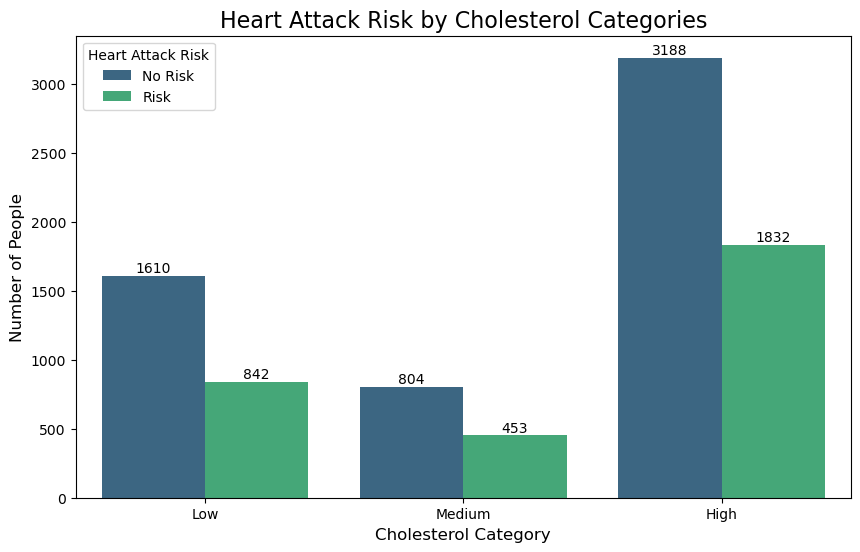

In [45]:
risk_counts = heart_data22.groupby(['Cholesterol_category', 'Heart Attack Risk']).size().reset_index(name='count')


plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=risk_counts, 
    x='Cholesterol_category', 
    y='count', 
    hue='Heart Attack Risk', 
    palette='viridis'
)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)
    
plt.title('Heart Attack Risk by Cholesterol Categories', fontsize=16)
plt.xlabel('Cholesterol Category', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['No Risk', 'Risk']
plt.legend(handles=handles, labels=labels, title='Heart Attack Risk', loc='upper left')
plt.show()

In [37]:
risk_counts = heart_data22.groupby(['Obesity', 'Heart Attack Risk']).size().reset_index(name='count')

In [38]:
# Map 'Obesity' values to more readable labels
risk_counts['Obesity'] = risk_counts['Obesity'].map({0: 'Not Obese', 1: 'Obese'})

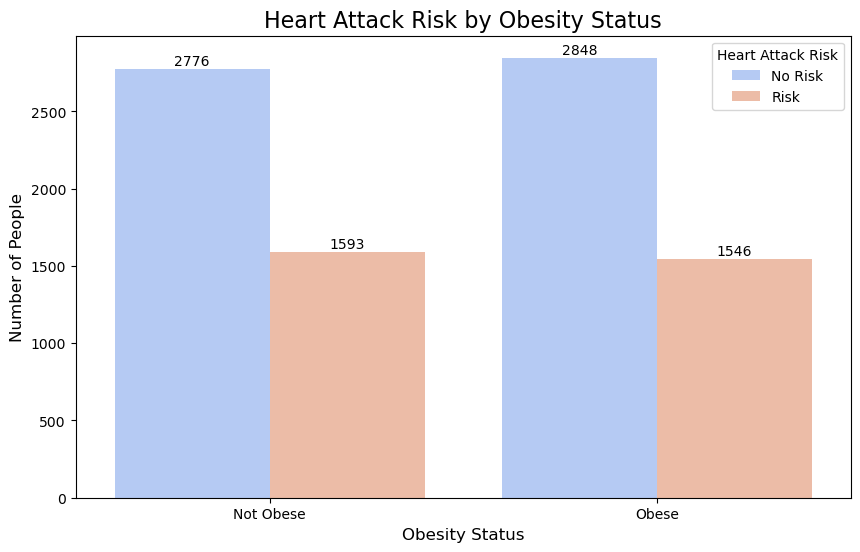

In [44]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=risk_counts, 
    x='Obesity', 
    y='count', 
    hue='Heart Attack Risk', 
    palette='coolwarm')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.title('Heart Attack Risk by Obesity Status', fontsize=16)
plt.xlabel('Obesity Status', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['No Risk', 'Risk']
plt.legend(handles=handles, labels=labels, title='Heart Attack Risk', loc='upper right')
plt.show()

In [223]:
heart_data.groupby(['Sex'], as_index=False)['Smoking'].sum().sort_values(by='Smoking',ascending=False)
# how many male and female smokes

,Sex,Smoking
0,0,6111
1,1,1748


In [220]:
heart_data.groupby(['Sex', 'Smoking'], as_index=False)['Heart Attack Risk'].sum()
# How many smokers are prone to disease

,Sex,Smoking,Heart Attack Risk
0,0,1,2195
1,1,0,329
2,1,1,615


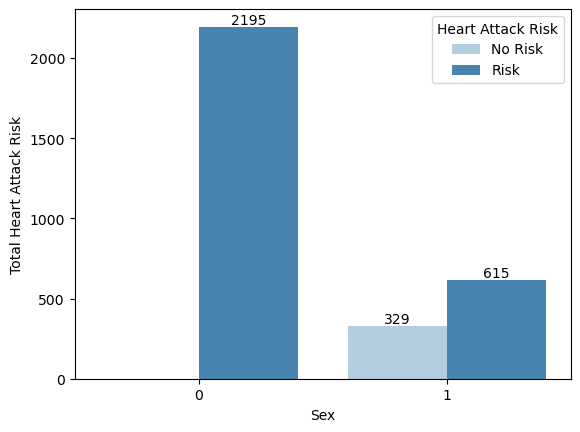

In [20]:
combined_risk = heart_data.groupby(['Sex', 'Smoking'], as_index=False)['Heart Attack Risk'].sum()

ax = sns.barplot(x='Sex', y='Heart Attack Risk', hue='Smoking', data=combined_risk, palette='Blues')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)
plt.xlabel('Sex')
plt.ylabel('Total Heart Attack Risk')
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['No Risk', 'Risk']
plt.legend(handles=handles, labels=labels, title='Heart Attack Risk', loc='upper right')
plt.show()

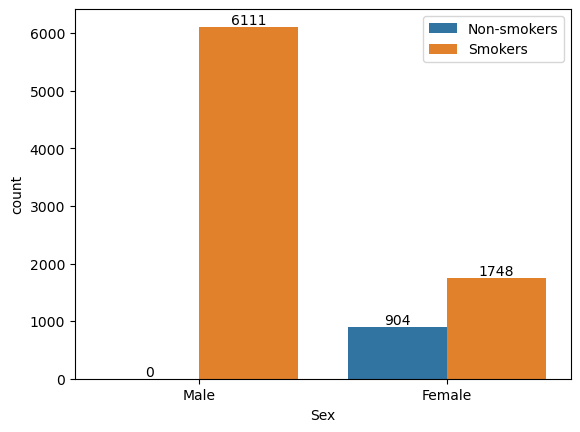

In [39]:
az = sns.countplot(data = heart_data, x= heart_data['Sex'], hue= heart_data['Smoking'])
plt.xticks([0,1],['Male','Female'])
plt.legend(labels=['Non-smokers', 'Smokers'])
for bars in az.containers:
    az.bar_label(bars)
plt.show()

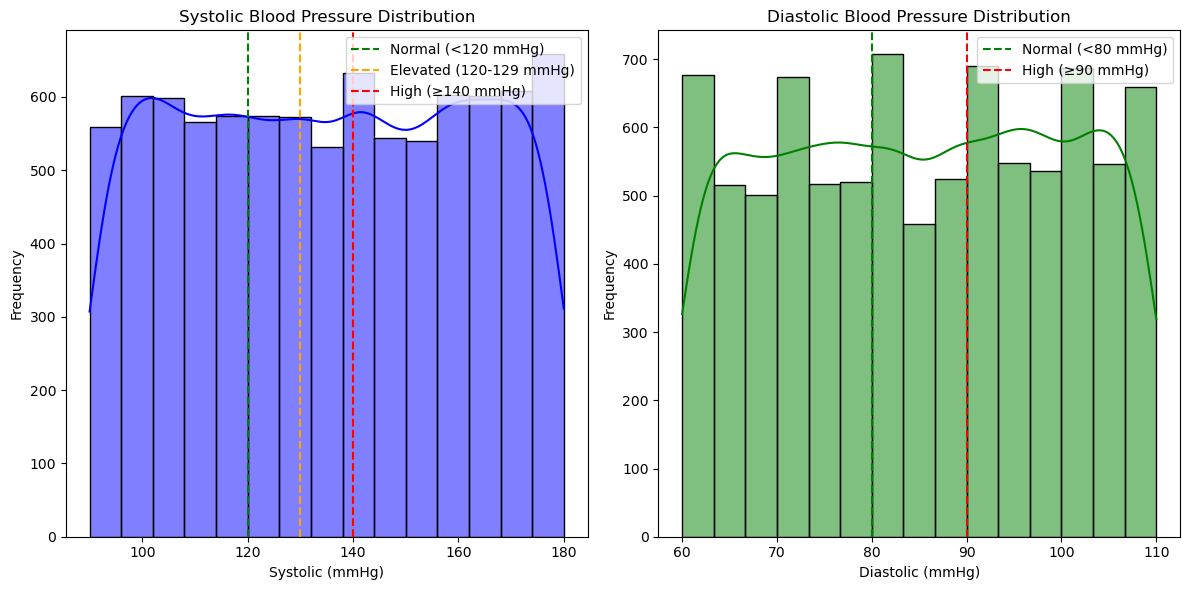

In [27]:
# Set figure size
plt.figure(figsize=(12, 6))

# Subplot for systolic pressure distribution
plt.subplot(1, 2, 1)
sns.histplot(heart_data22['BP_systolic'], kde=True, color='blue', bins=15)
plt.axvline(120, color='green', linestyle='--', linewidth=1.5, label='Normal (<120 mmHg)')
plt.axvline(130, color='orange', linestyle='--', linewidth=1.5, label='Elevated (120-129 mmHg)')
plt.axvline(140, color='red', linestyle='--', linewidth=1.5, label='High (≥140 mmHg)')
plt.title('Systolic Blood Pressure Distribution')
plt.xlabel('Systolic (mmHg)')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

# Subplot for diastolic pressure distribution
plt.subplot(1, 2, 2)
sns.histplot(heart_data22['BP_diastolic'], kde=True, color='green', bins=15)
plt.axvline(80, color='green', linestyle='--', linewidth=1.5, label='Normal (<80 mmHg)')
plt.axvline(90, color='red', linestyle='--', linewidth=1.5, label='High (≥90 mmHg)')
plt.title('Diastolic Blood Pressure Distribution')
plt.xlabel('Diastolic (mmHg)')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

# Adjust layout
plt.tight_layout()
plt.show()


1.Systolic Blood Pressure Distribution:
    
Normal Range (<120 mmHg):

Interpretation: This represents individuals with normal systolic blood pressure, indicating no immediate risk from this factor.

Elevated Range (120–129 mmHg):
    
The area between the green dashed line at 120 mmHg and the orange dashed line at 130 mmHg.

Interpretation: This is the population with elevated systolic pressure, which may indicate a higher likelihood of 
developing hypertension.

High Blood Pressure (≥140 mmHg):
    
Look at the area to the right of the red dashed line at 140 mmHg.

Interpretation: This group is at significant risk of heart-related conditions, including heart attacks.
    
2. Diastolic Blood Pressure Distribution:
    
Normal Range (<80 mmHg):

Interpretation: These individuals have normal diastolic pressure and are at a lower cardiovascular risk.
    
High Blood Pressure (≥90 mmHg):

Interpretation: This group is at higher risk, as elevated diastolic pressure stresses the heart and arteries during relaxation.


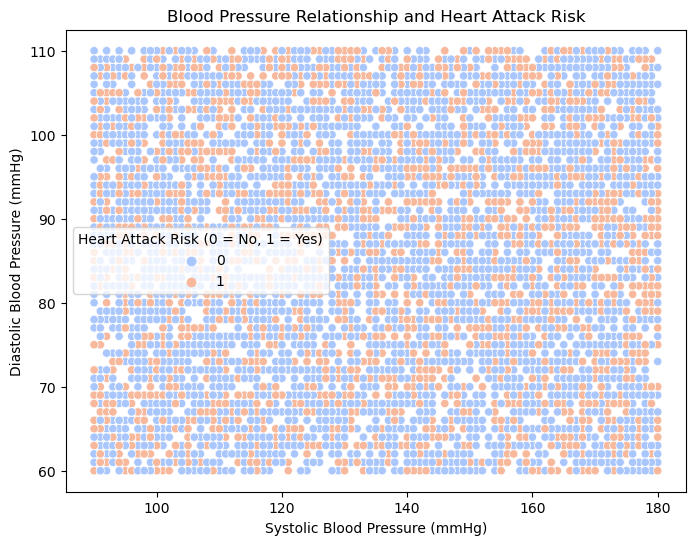

In [35]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=heart_data22, x='BP_systolic', y='BP_diastolic', hue='Heart Attack Risk', palette='coolwarm')
plt.title('Blood Pressure Relationship and Heart Attack Risk')
plt.xlabel('Systolic Blood Pressure (mmHg)')
plt.ylabel('Diastolic Blood Pressure (mmHg)')
plt.legend(title='Heart Attack Risk (0 = No, 1 = Yes)')
plt.show()


In [37]:
from scipy.stats import ttest_ind, mannwhitneyu

# Separate groups based on heart attack risk
group_no_risk = heart_data22[heart_data22['Heart Attack Risk'] == 0]
group_risk = heart_data22[heart_data22['Heart Attack Risk'] == 1]

# Perform t-tests for systolic and diastolic blood pressure
systolic_ttest = ttest_ind(group_no_risk['BP_systolic'], group_risk['BP_systolic'], equal_var=False)
diastolic_ttest = ttest_ind(group_no_risk['BP_diastolic'], group_risk['BP_diastolic'], equal_var=False)

print("T-Test Results:")
print(f"Systolic Blood Pressure: p-value = {systolic_ttest.pvalue:.4f}")
print(f"Diastolic Blood Pressure: p-value = {diastolic_ttest.pvalue:.4f}")

# If data is non-normal, perform Mann-Whitney U test
systolic_mwu = mannwhitneyu(group_no_risk['BP_systolic'], group_risk['BP_systolic'], alternative='two-sided')
diastolic_mwu = mannwhitneyu(group_no_risk['BP_diastolic'], group_risk['BP_diastolic'], alternative='two-sided')

print("\nMann-Whitney U Test Results:")
print(f"Systolic Blood Pressure: p-value = {systolic_mwu.pvalue:.4f}")
print(f"Diastolic Blood Pressure: p-value = {diastolic_mwu.pvalue:.4f}")


T-Test Results:
Systolic Blood Pressure: p-value = 0.0820
Diastolic Blood Pressure: p-value = 0.4803

Mann-Whitney U Test Results:
Systolic Blood Pressure: p-value = 0.0810
Diastolic Blood Pressure: p-value = 0.4710


# Key Findings:

Statistical tests indicate no significant difference in systolic and diastolic blood pressure values between individuals with and without heart attack risk in this dataset.

Systolic blood pressure showed a borderline p-value (
𝑝
=
0.0820)
, suggesting a possible trend toward higher systolic values in individuals at risk. This may indicate that systolic pressure could play a role in heart attack risk but requires further exploration with a larger sample size.

Diastolic blood pressure showed no significant relationship with heart attack risk (
𝑝
=
0.4803).

Implications:

While systolic blood pressure might have a weak association with heart attack risk, the dataset does not provide strong enough evidence to confirm this.
Diastolic blood pressure does not appear to be a differentiating factor for heart attack risk in this analysis.

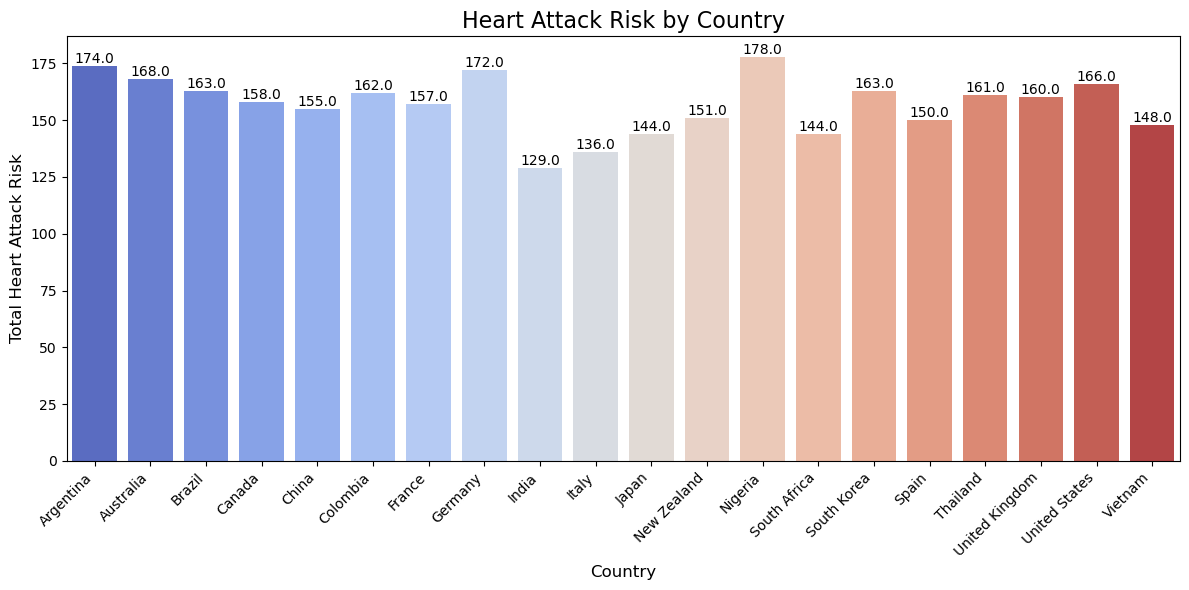

In [8]:
# Group data by Country and compute the total Heart Attack Risk
country_risk = heart_data.groupby('Country', as_index=False)['Heart Attack Risk'].sum()

# Plot the bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Country', y='Heart Attack Risk', data=country_risk, palette='coolwarm')

# Add titles and labels
plt.title('Heart Attack Risk by Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Heart Attack Risk', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add data labels to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

# Adjust layout
plt.tight_layout()
plt.show()


In [19]:
heart_data.columns

Index(['Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
       'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
       'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk', 'BP_systolic',
       'BP_diastolic'],
      dtype='object')

# import liabrary for modeling


In [18]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import math
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# SPLIT FEATURES AND TARGETS

In [19]:
X = heart_data22[['Age', 'Cholesterol', 'BP_systolic', 'BP_diastolic', 'Heart Rate',
       'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week',
       'Previous Heart Problems', 'Medication Use',
        'BMI', 'Triglycerides',
       'Sleep Hours Per Day',
       'Sex', 'Diet']]
Y = heart_data22['Heart Attack Risk']


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [21]:
#Handling missing values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # Or 'median', 'most_frequent', etc.
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [22]:
#Scaling Features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modeling Approach and Comparison

In [23]:
#compare the models performance
classi = [
    ['DecisionTreeClassifier', DecisionTreeClassifier()],
    ['Support Vector Machines', SVC()],
    ['RandomForestClassifier', RandomForestClassifier \
     (random_state=42, n_estimators = 300, max_depth = 30, criterion = 'entropy')],
    ['GradientBoostingClassifier', GradientBoostingClassifier()],
    ['AdaBoostClassifier', AdaBoostClassifier()],
    ['ExtraTreesClassifier', ExtraTreesClassifier()],
    ['K-Nearest Neighbors', KNeighborsClassifier()],
    ['XGBClassifier', XGBClassifier()]

]

In [24]:
result1 = []
results2 = []

In [25]:
for model in classi:
    name = model[0]
    mod = model[1]
    
    mod.fit(X_train, Y_train)
    Y_pred = mod.predict(X_test)
    
    #Errors Metrics
    mse = metrics.mean_squared_error(Y_pred,Y_test)
    rmse = math.sqrt(mse)
    mae = metrics.mean_absolute_error(Y_pred,Y_test)
    
    #Accuracy Metrics
    RMSE = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))
    acctrs = mod.score(X_train, Y_train)
    acctes = mod.score(X_test, Y_test)
    
    result1.append({'Model': name, 'MeanAbsoluteError': mae, 'AccuracyTraining': acctrs, 'AccuracyTesting': acctes})
    results2.append({'Model': name, 'MeanSqauredError': mse, 'RootMeanSquareError': rmse, 'MeanAbsoluteError': mae})
    
result1_heart_data = pd.DataFrame(result1)
results2_heart_data = pd.DataFrame(results2)

In [26]:
result1_heart_data.sort_values(by='MeanAbsoluteError')

,Model,MeanAbsoluteError,AccuracyTraining,AccuracyTesting
1,Support Vector Machines,0.357673,0.644793,0.642327
3,GradientBoostingClassifier,0.357673,0.660913,0.642327
4,AdaBoostClassifier,0.358813,0.642511,0.641187
2,RandomForestClassifier,0.359954,1.000000,0.640046
5,ExtraTreesClassifier,0.370793,1.000000,0.629207
7,XGBClassifier,0.415859,0.970613,0.584141
6,K-Nearest Neighbors,0.428979,0.714693,0.571021
0,DecisionTreeClassifier,0.452367,1.000000,0.547633


In [27]:
results2_heart_data

,Model,MeanSqauredError,RootMeanSquareError,MeanAbsoluteError
0,DecisionTreeClassifier,0.452367,0.672583,0.452367
1,Support Vector Machines,0.357673,0.598057,0.357673
2,RandomForestClassifier,0.359954,0.599962,0.359954
3,GradientBoostingClassifier,0.357673,0.598057,0.357673
4,AdaBoostClassifier,0.358813,0.599010,0.358813
5,ExtraTreesClassifier,0.370793,0.608928,0.370793
6,K-Nearest Neighbors,0.428979,0.654965,0.428979
7,XGBClassifier,0.415859,0.644871,0.415859


# Classification Report of all the model

In [28]:
# Initialize lists to collect results
models = []
accuracies = []
precisions = []
recalls = []
roc_aucs = []

# Iterate through classification models
for key in classi:
    name = key[0]  
    mod = key[1]  
    
    # Train the model
    mod.fit(X_train, Y_train)
    
    # Predictions
    predictions = mod.predict(X_test)
    prob_predictions = mod.predict_proba(X_test)[:, 1] if hasattr(mod, "predict_proba") else None
    
    # Calculate metrics
    acc = accuracy_score(Y_test, predictions)
    precision = precision_score(Y_test, predictions)
    recall = recall_score(Y_test, predictions)
    auc = roc_auc_score(Y_test, prob_predictions) if prob_predictions is not None else 0  # Set 0 if not available
    
    # Append results
    models.append(name)
    accuracies.append(acc)
    precisions.append(precision)
    recalls.append(recall)
    roc_aucs.append(auc)
    
    # Print the classification report
    print(f"Classification Report for {name}:")
    print(classification_report(Y_test, predictions))
    print(f"ROC AUC Score: {auc}\n")

Classification Report for DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       0.64      0.63      0.64      1125
           1       0.36      0.37      0.36       628

    accuracy                           0.54      1753
   macro avg       0.50      0.50      0.50      1753
weighted avg       0.54      0.54      0.54      1753

ROC AUC Score: 0.4982321302193914

Classification Report for Support Vector Machines:
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1125
           1       1.00      0.00      0.00       628

    accuracy                           0.64      1753
   macro avg       0.82      0.50      0.39      1753
weighted avg       0.77      0.64      0.50      1753

ROC AUC Score: 0

Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.64      0.99      0.78      1125
           1       0.45      0.02

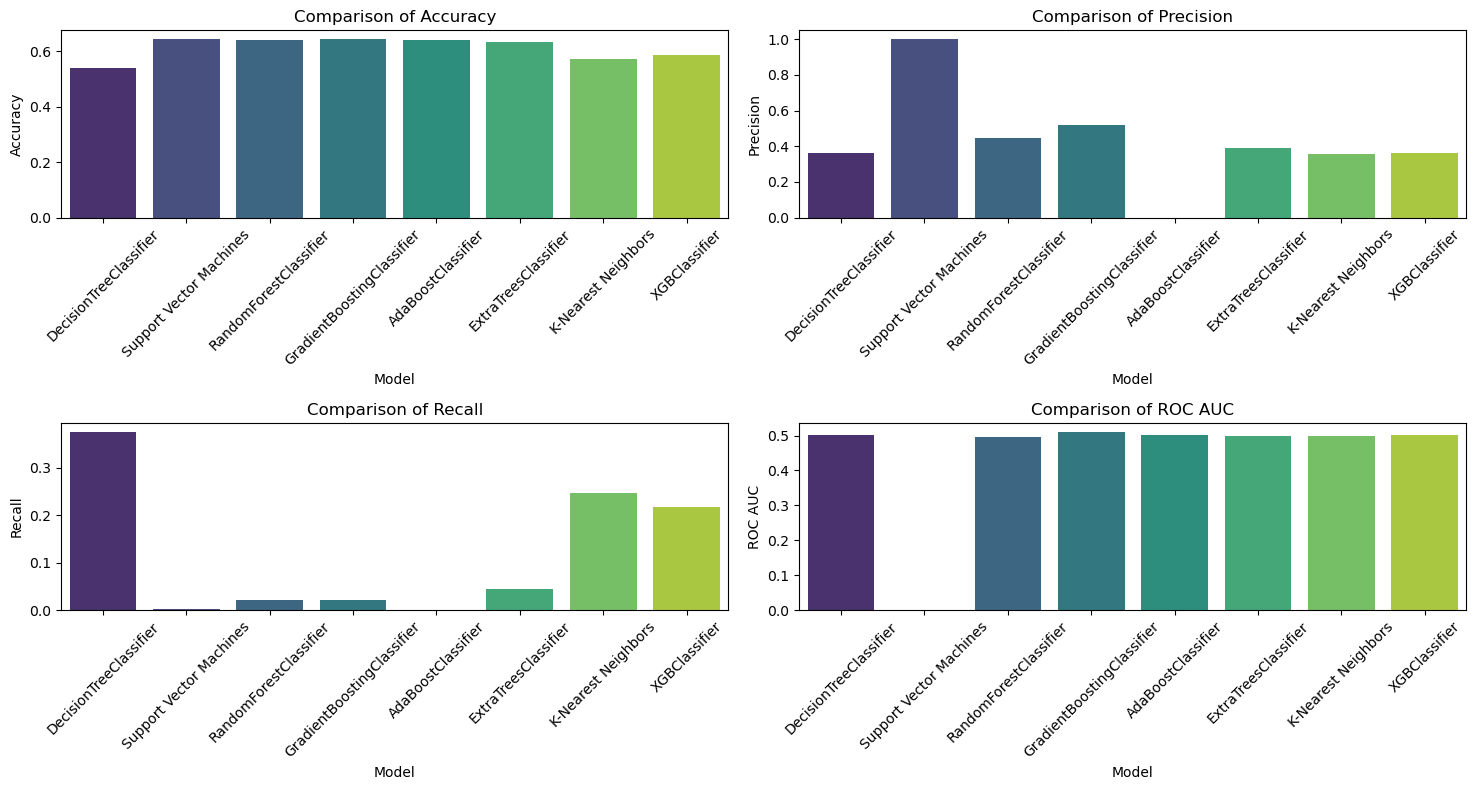

In [48]:
# Create a DataFrame from the collected results
result1_heart_data = pd.DataFrame({
    "Model": models,
    "Accuracy": accuracies,
    "Precision": precisions,
    "Recall": recalls,
    "ROC AUC": roc_aucs
})

# Plot the metrics for comparison
metrics = ["Accuracy", "Precision", "Recall", "ROC AUC"]
plt.figure(figsize=(15, 8))

for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i + 1)  # 2x2 grid for subplots
    sns.barplot(x="Model", y=metric, data=result1_heart_data, palette="viridis")
    plt.title(f"Comparison of {metric}")
    plt.ylabel(metric)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


1. Comparison of Accuracy

Key Finding:
    
Most models, including Gradient Boosting, Random Forest, and Extra Trees Classifier, exhibit high accuracy close to 0.6.

Decision Tree Classifier has the lowest accuracy, significantly lagging behind others.

Models like K-Nearest Neighbors and XGBoost show comparable performance, slightly below the top-performing classifiers.

Insight: While accuracy is a crucial metric, its reliability diminishes in imbalanced datasets like this one. Additional metrics should be considered.

2. Comparison of Precision

Key Finding:
    
Support Vector Machines (SVM) stand out with the highest precision, nearing 1.0, indicating its strength in minimizing false positives.

Other models, including Gradient Boosting and Random Forest, display moderate precision values.

Decision Tree Classifier has the lowest precision, signaling its limitation in accurately predicting positive classes.

Insight: Precision is critical when false positives carry significant consequences (e.g., unnecessary medical interventions). SVM appears to be the most suitable model for such cases.

3. Comparison of Recall

Key Finding:
    
Decision Tree Classifier has a disproportionately high recall, surpassing all other models.

Models like K-Nearest Neighbors and XGBoost show better balance in recall compared to others.

Support Vector Machines, despite high precision, struggles with low recall, indicating poor sensitivity to the minority class.

Insight: Recall is essential in scenarios where missing positive cases (false negatives) is costly, such as in healthcare. Decision Tree's high recall suggests it identifies more true positives but may overcompensate with false positives.

4. Comparison of ROC AUC

Key Finding:
    
Random Forest, Gradient Boosting, and Extra Trees Classifier achieve the highest ROC AUC scores, indicating their superior capability to distinguish between classes.

Decision Tree Classifier lags behind, reinforcing its inconsistency across metrics.

XGBoost and K-Nearest Neighbors also perform well in terms of AUC, showing their potential for balanced classification.

Insight: ROC AUC provides a comprehensive measure of classification performance. Models like Random Forest and Gradient Boosting emerge as strong contenders.



# Best Model for Balance:

Gradient Boosting and Random Forest strike a good balance across accuracy, precision, recall, and ROC AUC.

# MODEL: RandomForest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)

In [30]:
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [31]:
accuracy = model.score(X_test, Y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6303479749001711


In [32]:
from sklearn.metrics import classification_report, confusion_matrix

Y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(Y_test, Y_pred))

print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.96      0.77      1125
           1       0.33      0.03      0.06       628

    accuracy                           0.63      1753
   macro avg       0.49      0.50      0.41      1753
weighted avg       0.53      0.63      0.52      1753

Confusion Matrix:
[[1085   40]
 [ 608   20]]


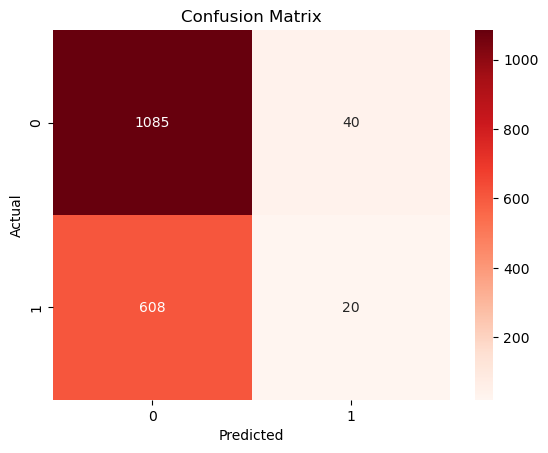

In [33]:
# Assuming test_Y_pred is the predicted values on the test set
con_mat = confusion_matrix(Y_test, Y_pred)

# Create heatmap for confusion matrix
sns.heatmap(con_mat, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Results show an imbalance between the two classes

In [34]:
print(X_train.shape)
print(Y_train.shape)


(7010, 18)
(7010,)


# Rescaling values

# Adjusted the model to handle the class imbalance

In [37]:
smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X_scaled, Y_resample)

# Split the resampled data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42)

# Initialize the classifier (Random Forest as an example)
clf = RandomForestClassifier(random_state=42)

# Train the model
clf.fit(X_train, Y_train)

# Make predictions
Y_pred = clf.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(Y_test, Y_pred))

print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.76      0.70      1120
           1       0.71      0.58      0.64      1130

    accuracy                           0.67      2250
   macro avg       0.68      0.67      0.67      2250
weighted avg       0.68      0.67      0.67      2250

Confusion Matrix:
[[849 271]
 [471 659]]


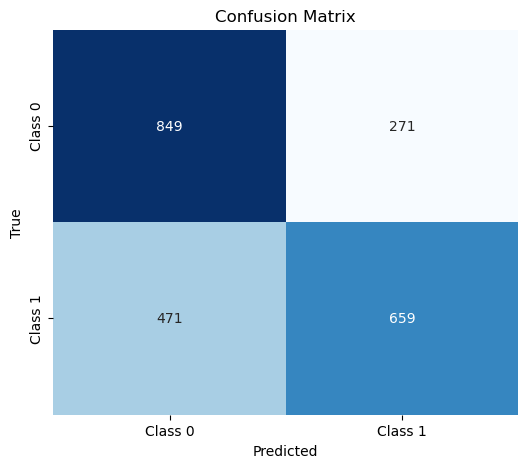

In [38]:
cm = confusion_matrix(Y_test, Y_pred)

# Plotting the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'], cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Feature Importance in Heart Attack Prediction (Random Forest)

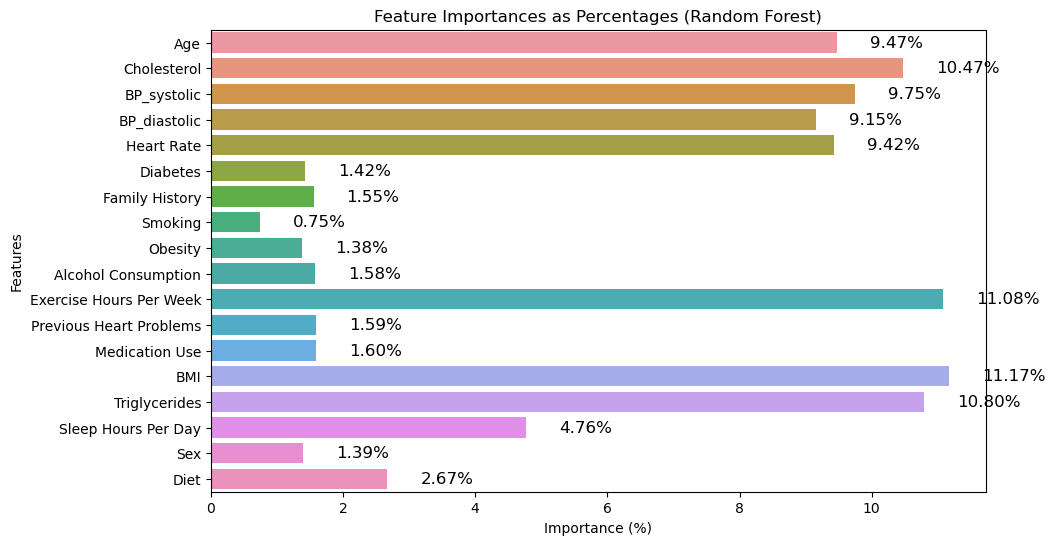

In [45]:
feature_importances = model.feature_importances_

# Get the feature names (excluding the target column)
feature_names = ['Age', 'Cholesterol', 'BP_systolic', 'BP_diastolic', 'Heart Rate', 
                 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 
                 'Exercise Hours Per Week', 'Previous Heart Problems', 'Medication Use', 
                 'BMI', 'Triglycerides', 'Sleep Hours Per Day', 'Sex', 'Diet']

# Convert feature importances to percentages
feature_importances_percent = feature_importances * 100

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances_percent, y=feature_names)

# Add the values on top of the bars as percentages
for index, value in enumerate(feature_importances_percent):
    plt.text(value + 0.5, index, f'{value:.2f}%', va='center', fontsize=12)  # Format as percentage with 2 decimal places

# Titles and labels
plt.title('Feature Importances as Percentages (Random Forest)')
plt.xlabel('Importance (%)')
plt.ylabel('Features')

# Show the plot
plt.show()

## Other Models

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Instantiate the model
log_reg_model = LogisticRegression()

# Fit the model
log_reg_model.fit(X_train, Y_train)

# Predictions
Y_pred_log_reg = log_reg_model.predict(X_test)

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(Y_test, Y_pred_log_reg))
print(classification_report(Y_test, Y_pred_log_reg))
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred_log_reg))


Logistic Regression Accuracy: 0.6417569880205363
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1125
           1       0.00      0.00      0.00       628

    accuracy                           0.64      1753
   macro avg       0.32      0.50      0.39      1753
weighted avg       0.41      0.64      0.50      1753

Confusion Matrix:
[[1125    0]
 [ 628    0]]


C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with 

In [28]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Instantiate the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Fit the model
xgb_model.fit(X_train, Y_train)

# Predictions
Y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
print("XGBoost Accuracy:", accuracy_score(Y_test, Y_pred_xgb))
print(classification_report(Y_test, Y_pred_xgb))
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred_xgb))


C:\Users\dell\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:49:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.5841414717626925
              precision    recall  f1-score   support

           0       0.64      0.79      0.71      1125
           1       0.36      0.22      0.27       628

    accuracy                           0.58      1753
   macro avg       0.50      0.50      0.49      1753
weighted avg       0.54      0.58      0.55      1753

Confusion Matrix:
[[888 237]
 [492 136]]


In [47]:
import pickle

# Save the model to a pickle file
with open('heart_attack_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved as 'heart_attack_model.pkl'")


Model saved as 'heart_attack_model.pkl'


In [48]:
# Load the saved model
with open('heart_attack_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

print("Model loaded successfully")


Model loaded successfully


# Lifestyle Recommendation Based on Risk Prediction

In [49]:
def dicti_vals(dicti):
    x = list(dicti.values())
    x = np.array([x])
    return x

In [50]:
def determine_lifestyle_changes(predict_type, dictionary):
    lifestyle_changes = []  # List to store recommended lifestyle changes

    # Check if the predicted risk indicates a higher likelihood of heart attack (greater than 0)
    if predict_type > 0:
        # Check conditions for different lifestyle recommendations based on the individual's health data
        if 'Smoking' in new_person and new_person['Smoking'] == 1:
            lifestyle_changes.append('quit smoking')  # Suggest quitting smoking if the person smokes
        if 'BMI' in new_person and new_person['BMI'] < 18.5:
            lifestyle_changes.append('gain weight')  # Suggest gaining weight if BMI is too low
        elif 'BMI' in new_person and new_person['BMI'] > 25:
            lifestyle_changes.append('lose weight')  # Suggest losing weight if BMI is too high
        if 'Exercise Hours Per Week' in new_person and new_person['Exercise Hours Per Week'] < 1.25:
            lifestyle_changes.append('do more exercise')  # Suggest exercising more if the person does not exercise enough
        if 'Diet' in new_person and new_person['Diet'] == 0:
            lifestyle_changes.append('eat healthy food')  # Suggest improving diet if the diet is unhealthy
        if 'Alcohol Consumption' in new_person and new_person['Alcohol Consumption'] == 1:
            lifestyle_changes.append('try reducing alcohol')  # Suggest reducing alcohol intake if the person consumes alcohol

        # Print the recommended lifestyle changes
        print("Heart attack risk:", predict_type)
        for i in lifestyle_changes:
            print(f"Please {i},")
        print("This can reduce your heart attack risk.")
        
    # If the predicted risk is extremely high, advise immediate consultation with a doctor
    if predict_type > 0.75:
        print("You should consult a doctor immediately.")
        print("Heart attack risk:", predict_type)

In [51]:
new_person = {'Age': 21, 'Cholesterol': 124, 'BP_systolic': 120, 'BP_diastolic': 80, 'Heart Rate': 72,
       'Diabetes': 0, 'Family History': 0, 'Smoking': 1, 'Obesity': 0,
       'Alcohol Consumption':0, 'Exercise Hours Per Week': 2.07,
       'Previous Heart Problems':0, 'Medication Use':0,
        'BMI': 18.5, 'Triglycerides': 132
       , 'Sleep Hours Per Day' : 4,
       'Sex': 0, 'Diet': 1}
dict1 = pd.DataFrame([new_person])
x = dicti_vals(new_person)
x

array([[ 21.  , 124.  , 120.  ,  80.  ,  72.  ,   0.  ,   0.  ,   1.  ,
          0.  ,   0.  ,   2.07,   0.  ,   0.  ,  18.5 , 132.  ,   4.  ,
          0.  ,   1.  ]])

In [52]:
#Use the trained model to predict the heart attack risk for the new individual
model.predict(x)


array([0], dtype=int64)

In [53]:
#predict the heart attack risk and provide tailored recommendations
predict_type = model.predict_proba(x)[:, 1]
result = determine_lifestyle_changes(predict_type, new_person)
result

Heart attack risk: [0.49]
Please quit smoking,
This can reduce your heart attack risk.
